Silhouette Score: 0.88
Inertia (WCSS): 203.89


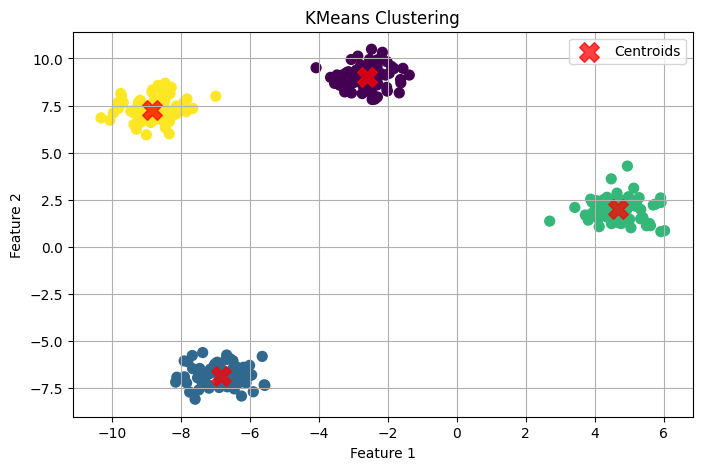

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Step 3: Evaluation
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.2f}")
print(f"Inertia (WCSS): {kmeans.inertia_:.2f}")

# Step 4: Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


##  Silhouette Score: 0.88
This is very high (range is from -1 to 1):

> 0.7 → Excellent separation between clusters

0.5 – 0.7 → Reasonable structure

< 0.5 → Weak structure, overlapping clusters

< 0 → Bad clustering (points might be assigned to the wrong cluster)

Your Score (0.88) means:

Clusters are tight and well-separated

KMeans did a great job grouping your data

##  Inertia (WCSS): 203.89
This measures:

The total distance between each point and the centroid of its assigned cluster
– a measure of compactness.

Lower WCSS = better, but…

WCSS always decreases as k increases → that’s why we use the Elbow Method to find where it levels off (the elbow).

So:

 Your WCSS (203.89):
It's low, but only meaningful in comparison to other k values using the Elbow plot.

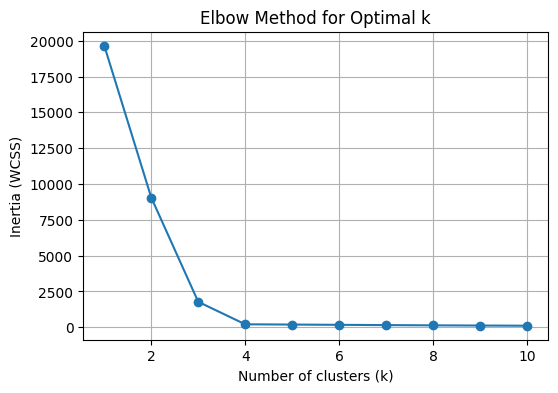

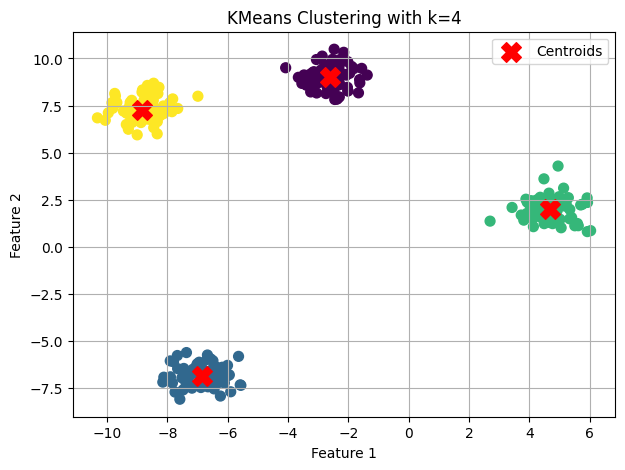

Silhouette Score for k=4: 0.876


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Step 2: Use the Elbow Method to find optimal k
wcss = []  # Within-cluster sum of squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.show()

# Step 3: Apply KMeans with optimal k (4 in this case)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 4: Visualize clusters and centroids
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title(f"KMeans Clustering with k={k_optimal}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Silhouette Score
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for k={k_optimal}: {sil_score:.3f}")



🟦 Number of points in cluster 0: 75

📌 Cosine Similarity of point 0 with others in Cluster 0:
 [1.         0.99784721 0.99929807 0.99840471 0.99191062 0.99663105
 0.99993574 0.99946025 0.99936371 0.99754136 0.99450932 0.99999932
 0.99983838 0.99839345 0.99992772 0.99851844 0.99910474 0.99616924
 0.99625374 0.99717666 0.99614644 0.99978585 0.99999673 0.99994755
 0.99957666 0.99844918 0.99998992 0.99999561 0.99594324 0.99858556
 0.99907525 0.99993187 0.99622138 0.99574692 0.99848485 0.99859135
 0.9992976  0.99804397 0.98912647 0.99786956 0.98891534 0.99048261
 0.99933344 0.99866771 0.9994719  0.99756679 0.99291534 0.99994786
 0.98613455 0.99997361 0.99999099 0.99999969 0.99882763 0.99820927
 0.99795612 0.9983643  0.99987378 0.99897548 0.99935679 0.99978052
 0.99937605 0.99051637 0.99760055 0.99410902 0.99964573 0.99904261
 0.99228949 0.99922805 0.99715963 0.99200454 0.99605796 0.99982068
 0.99920078 0.9955251  0.99219857]

📌 Euclidean Distance of point 0 with others in Cluster 0:
 [0.  

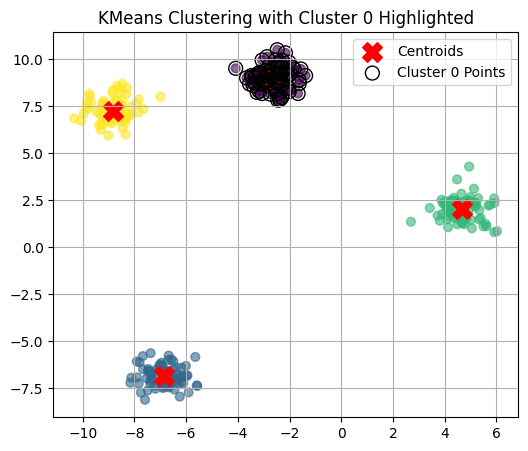

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Step 1: Generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Step 3: Pick one cluster to analyze (e.g., cluster 0)
cluster_num = 0
cluster_points = X[cluster_labels == cluster_num]

print(f"\n🟦 Number of points in cluster {cluster_num}: {len(cluster_points)}")

# Step 4: Compute similarity and distances within the cluster
cos_sim = cosine_similarity(cluster_points)
euc_dist = euclidean_distances(cluster_points)

# Step 5: Show similarity/distance for a single example (e.g., first point in cluster)
example_idx = 0
print(f"\n Cosine Similarity of point {example_idx} with others in Cluster {cluster_num}:\n", cos_sim[example_idx])
print(f"\n Euclidean Distance of point {example_idx} with others in Cluster {cluster_num}:\n", euc_dist[example_idx])

# Step 6: Optional – visualize cluster
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=40, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f"KMeans Clustering with Cluster {cluster_num} Highlighted")
plt.scatter(cluster_points[:, 0], cluster_points[:, 1], edgecolor='black', facecolor='none', s=100, label='Cluster 0 Points')
plt.legend()
plt.grid(True)
plt.show()


cosine_similarity: How "directionally similar" each pair is

euclidean_distances: Physical distance between points

## Out of the 300 total points (from your dataset), the KMeans algorithm has grouped:

75 points into Cluster 0

So basically:

 Cluster 0 contains 75 similar data points (based on the distance metric used by KMeans — typically Euclidean).


 If you chose k=4:

Your data is split into 4 clusters (e.g. Cluster 0, Cluster 1, Cluster 2, Cluster 3)

Each cluster will have some number of points — not always evenly split

You just checked how many points ended up in Cluster 0




In [ ]:
import numpy as np
unique, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} points")


Cluster 0: 75 points
Cluster 1: 75 points
Cluster 2: 75 points
Cluster 3: 75 points


In [ ]:
# Get upper triangle indices (excluding diagonal)
triu_indices = np.triu_indices_from(cos_sim_matrix, k=1)
pair_similarities = cos_sim_matrix[triu_indices]

# Get top N most similar pairs
top_n = 5
top_indices = pair_similarities.argsort()[-top_n:][::-1]

print(f"Top {top_n} most similar pairs in Cluster 0:")
for idx in top_indices:
    i, j = triu_indices[0][idx], triu_indices[1][idx]
    print(f"Points {i} & {j} → Cosine Similarity: {cos_sim_matrix[i][j]:.4f}")


Top 5 most similar pairs in Cluster 0:
Points 23 & 47 → Cosine Similarity: 1.0000
Points 29 & 35 → Cosine Similarity: 1.0000
Points 3 & 13 → Cosine Similarity: 1.0000
Points 41 & 61 → Cosine Similarity: 1.0000
Points 21 & 59 → Cosine Similarity: 1.0000
